# GENERAL: TO DELETE

Found some crazy resources which will make our life much easier

> 1. [kaggle EEG Muse (meh)](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-mental-state)
> 1. [Crazy code that makes literally 1000 features for you](https://github.com/jordan-bird/eeg-feature-generation)
> 1. [Explanation of features and their importance ans science and shite](https://link.springer.com/chapter/10.1007/978-3-030-29933-0_37)

-Almu

# General

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 24 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 22 files were added from the NOT TIRED category
> 10 files were added from the TIRED category



## Available Features

In [5]:
pd.DataFrame(sample.columns)

,0
0,TimeStamp
1,Delta_TP9
2,Delta_AF7
3,Delta_AF8
4,Delta_TP10
5,Theta_TP9
6,Theta_AF7
7,Theta_AF8
8,Theta_TP10
9,Alpha_TP9


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])
        
rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 3min 36s


In [8]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


In [9]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
452,2021-11-12 06:29:34.149,NaN,NaN,NaN,NaN,NaN
453,2021-11-12 06:29:34.364,845.347985,590.293040,1199.523810,852.197802,680.146520
454,2021-11-12 06:29:35.364,811.501832,514.542125,695.457875,851.794872,835.677656
455,2021-11-12 06:29:35.788,NaN,NaN,NaN,NaN,NaN


In [10]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(9685, 6) 
Tired Data size is: 		(10796, 6)


## Adding empty column 
Append an empty column in order to run the method.


In [11]:
#Conserve headers
headers = original_NT.columns.values.tolist()

#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))

In [12]:
#Reattach headers
data_T.columns =  np.hstack((headers, ['Empty']));
data_NT.columns = np.hstack((headers, ['Empty']));

#Check
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,2021-11-01 17:27:31.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0
...,...,...,...,...,...,...,...
9680,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179,0.0
9681,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883,0.0
9682,2021-11-02 22:14:36.024,776.849817,800.21978,793.369963,803.040293,482.307692,0.0
9683,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883,0.0


## Remove Empty Rows

In [13]:
data_T = data_T.dropna()

In [14]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps

In [15]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [16]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,1635812851.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0


## Save RAW Data to File

In [17]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


from eegFG import EEG_feature_extraction as FG

x, y = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=50, 
                                         period=10, 
                                         remove_redundant=True, 
                                         cols_to_ignore=None)

#state=data_NT.iloc[:,-1]

## EEG Feature Generation

In [18]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 50;
Perio = 7;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

C:\Users\Musa\anaconda3\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


(19, 984)

In [19]:
xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(149, 984)

```python

%%time

from importlib import reload

flaggity=False

tmp_results=[]
thresh = 95;
for ns in range(50,256,1):
    if (flaggity==True):
        break;
    for p in range(3,8):
        
        try:
            reload(FG);
            xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
            
            xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
        
        except (UnboundLocalError):
            continue;
            
        
        if (xNT.shape[1] == xT.shape[1]):
            print('Cols match!', xT.shape, xNT.shape)
            if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
                print('Thresh met.')
                tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
                flaggity=True;
                break;
                
                
tmp_results

```

In [21]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.0,199.000000,199.000000,199.000000,199.000000,...,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0
mean,762.918780,780.461728,802.690875,766.203834,848.939649,0.0,-5.227032,-4.906895,-3.565037,-6.443442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11.554468,8.345314,10.363313,17.823408,57.264837,0.0,43.273463,26.658488,31.734484,51.826446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,734.139194,762.344322,788.880167,742.082679,765.855573,0.0,-69.894046,-44.601902,-51.936702,-106.724826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,759.351125,776.389325,793.542648,748.472004,804.421769,0.0,-50.851650,-25.801618,-28.381420,-40.157631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,763.150183,779.900576,808.451073,768.618524,826.007326,0.0,8.565289,-4.500448,6.431615,-12.142206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,767.121926,783.411826,813.976975,776.043956,907.111460,0.0,29.777842,20.095424,25.256480,30.891568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,788.880167,799.759288,815.703820,810.811094,947.059131,0.0,58.708602,42.804658,47.427746,90.233226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
pd.DataFrame(X_NT)

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
0,788.880167,799.759288,791.297750,810.811094,832.281528,0.0,20.626811,-4.500448,6.431615,30.891568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,788.880167,799.759288,791.297750,810.811094,832.281528,0.0,20.626811,-4.500448,6.431615,30.891568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,788.880167,799.759288,791.297750,810.811094,832.281528,0.0,20.626811,-4.500448,6.431615,30.891568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,788.880167,799.759288,791.297750,810.811094,832.281528,0.0,20.626811,-4.500448,6.431615,30.891568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,788.880167,799.759288,791.297750,810.811094,832.281528,0.0,20.626811,-4.500448,6.431615,30.891568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,756.933543,773.108320,790.779696,746.687598,890.706436,0.0,-29.784696,-9.228745,-10.574376,30.094117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,756.933543,773.108320,790.779696,746.687598,890.706436,0.0,-29.784696,-9.228745,-10.574376,30.094117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,756.933543,773.108320,790.779696,746.687598,890.706436,0.0,-29.784696,-9.228745,-10.574376,30.094117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,756.933543,773.108320,790.779696,746.687598,890.706436,0.0,-29.784696,-9.228745,-10.574376,30.094117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,...,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,991.857085,999.886621,1221.122158,810.311646,756.491656,0.0,132.077334,-296.408656,-244.883937,147.121807,...,1.497621e-17,8.743808e-19,1.363149e-18,1.320182e-18,7.940232e-19,9.536869e-18,7.622103e-19,1.216076e-18,1.204031e-18,7.397238e-19
std,90.034683,198.251248,153.893649,96.233311,20.636431,0.0,356.275448,434.756827,477.714226,373.360271,...,1.462688e-17,2.165462e-18,1.760859e-18,1.705357e-18,1.966451e-18,1.604378e-17,1.887665e-18,1.570877e-18,1.555317e-18,1.831975e-18
min,842.469911,602.956567,900.204082,674.160126,725.102041,0.0,-408.291173,-714.691297,-830.059362,-281.459655,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,944.008373,812.480377,1085.436944,698.738880,732.757718,0.0,-227.687128,-632.394007,-614.211345,-263.220884,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,966.457352,1051.821036,1319.712193,809.199372,761.941392,0.0,322.669613,-421.490246,-474.552058,65.928870,...,2.088233e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1102.705390,1157.043433,1325.238095,929.215071,777.252747,0.0,379.804226,47.181975,366.668660,668.760087,...,2.088233e-17,0.000000e+00,2.409852e-18,2.333893e-18,0.000000e+00,2.195698e-17,0.000000e+00,2.149849e-18,2.128554e-18,0.000000e+00
max,1122.679226,1227.613815,1357.299843,947.231816,778.173731,0.0,644.449538,564.695320,451.236326,732.762321,...,4.176465e-17,6.183121e-18,4.819705e-18,4.667786e-18,5.614878e-18,4.391396e-17,5.389916e-18,4.299699e-18,4.257108e-18,5.230904e-18


In [24]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

In [25]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [26]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [36]:
print(X_T.shape[0], X_NT.shape[0])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


99 199




In [28]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5,Target
0,1157.043433,1321.669283,674.160126,761.941392,0.0,-408.291173,-362.875115,-49.558953,-263.220884,-40.294708,...,0.0,0.000000e+00,0.000000e+00,0.0,2.195698e-17,0.0,0.000000e+00,0.000000e+00,0.0,1.0
1,799.759288,791.297750,810.811094,832.281528,0.0,20.626811,-4.500448,6.431615,30.891568,46.751789,...,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
2,780.015699,793.772894,743.751962,889.727891,0.0,8.565289,4.459747,-28.381420,1.740738,-157.972487,...,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
3,778.519100,794.578755,759.005756,919.429618,0.0,58.708602,20.095424,-19.558990,-12.142206,-0.588225,...,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
4,787.498692,795.269492,768.503401,947.059131,0.0,-12.468976,-21.290738,15.786429,-49.655175,122.218489,...,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,779.267399,808.451073,776.274202,823.071690,0.0,49.444462,37.535522,-49.974533,90.233226,256.583109,...,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
294,995.583464,1198.602826,841.664050,725.102041,0.0,-100.809661,-421.490246,-603.458040,31.254339,-258.325503,...,0.0,2.409852e-18,2.333893e-18,0.0,0.000000e+00,0.0,2.149849e-18,2.128554e-18,0.0,1.0
295,774.201988,788.880167,748.472004,907.111460,0.0,29.777842,3.987455,-26.403680,50.072373,-57.991787,...,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0
296,779.267399,808.451073,776.274202,823.071690,0.0,49.444462,37.535522,-49.974533,90.233226,256.583109,...,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0


## Separating Input and Output

In [29]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting Dataset into the Training and Test Sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [31]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [32]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,973,974,975,976,977,978,979,980,981,982
0,1.899435,1.712910,-1.785623,-0.854190,0.0,-2.083379,-0.926695,0.109229,-1.348821,-0.185510,...,1.446137,-0.230429,-0.387795,-0.387795,-0.230429,1.886303,-0.230429,-0.387795,-0.387795,-0.230429
1,-0.377204,-0.704419,0.559191,0.231275,0.0,-0.040387,0.330977,0.298486,0.001554,0.436829,...,-0.476660,-0.230429,-0.387795,-0.387795,-0.230429,-0.314384,-0.230429,-0.387795,-0.387795,-0.230429
2,-0.503011,-0.693138,-0.591486,1.117767,0.0,-0.097838,0.362422,0.180813,-0.132288,-1.026848,...,-0.476660,-0.230429,-0.387795,-0.387795,-0.230429,-0.314384,-0.230429,-0.387795,-0.387795,-0.230429
3,-0.512548,-0.689465,-0.329744,1.576114,0.0,0.141002,0.417293,0.210634,-0.196030,0.098372,...,-0.476660,-0.230429,-0.387795,-0.387795,-0.230429,-0.314384,-0.230429,-0.387795,-0.387795,-0.230429
4,-0.455329,-0.686317,-0.166773,2.002483,0.0,-0.198026,0.272054,0.330106,-0.368265,0.976379,...,-0.476660,-0.230429,-0.387795,-0.387795,-0.230429,-0.314384,-0.230429,-0.387795,-0.387795,-0.230429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-0.507779,-0.626238,-0.033433,0.089152,0.0,0.096875,0.478497,0.107825,0.274012,1.937019,...,-0.476660,-0.230429,-0.387795,-0.387795,-0.230429,-0.314384,-0.230429,-0.387795,-0.387795,-0.230429
294,0.870601,1.151997,1.088601,-1.422682,0.0,-0.618805,-1.132398,-1.763030,0.003219,-1.744322,...,1.446137,-0.230429,1.575931,1.575931,-0.230429,-0.314384,-0.230429,1.575931,1.575931,-0.230429
295,-0.540056,-0.715438,-0.510494,1.386024,0.0,0.003201,0.360764,0.187498,0.089620,-0.312035,...,-0.476660,-0.230429,-0.387795,-0.387795,-0.230429,-0.314384,-0.230429,-0.387795,-0.387795,-0.230429
296,-0.507779,-0.626238,-0.033433,0.089152,0.0,0.096875,0.478497,0.107825,0.274012,1.937019,...,-0.476660,-0.230429,-0.387795,-0.387795,-0.230429,-0.314384,-0.230429,-0.387795,-0.387795,-0.230429


# Principal Component Analysis
## Calculate Principal Components

In [116]:
from sklearn.decomposition import PCA

information = 225; #99.9/100;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (238, 225) 
Test set shape  =  (60, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-503427.723400,-18161.631017,25623.704599,-74911.593178,805.353712,-1483.012156,5887.669885,99.892350,-1233.873778,-583.049831,...,309.035366,394.834666,-268.540311,895.890124,-218.740678,-505.819239,-335.225326,-418.238669,-890.857483,-429.961712
1,-503435.031288,-18161.163491,25619.290702,-74913.014960,806.380755,-1482.184959,5887.286395,98.113559,-1235.764358,-582.709061,...,309.508985,395.426775,-269.831317,896.323235,-215.704150,-505.933860,-336.975299,-418.634376,-890.138770,-431.324804
2,-503434.990114,-18161.199812,25619.285694,-74912.859290,806.301906,-1482.152507,5887.185686,98.122775,-1235.827479,-582.749568,...,309.383990,395.662264,-268.836256,895.771652,-216.111733,-505.752612,-336.465562,-418.747794,-889.904618,-431.226114
3,-503434.981430,-18161.224921,25619.219439,-74912.541506,806.271823,-1482.130139,5887.137026,98.129004,-1235.950291,-582.829729,...,309.623276,395.719729,-269.415170,896.382537,-215.831442,-506.047028,-336.870293,-418.525691,-890.023409,-431.415887
4,-503434.998912,-18161.192491,25619.332185,-74912.921191,806.355121,-1482.176723,5887.267591,98.118159,-1235.864104,-582.768952,...,309.000649,395.443444,-269.071070,896.027049,-215.561024,-505.722667,-337.326212,-418.519675,-889.755122,-430.753065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-503434.825684,-18161.255291,25618.824825,-74908.396453,805.813652,-1482.186005,5887.480012,98.037445,-1235.806699,-582.737545,...,309.363667,394.876050,-269.510858,898.515439,-216.121353,-506.151205,-337.682421,-418.454500,-890.448883,-430.853609
294,-503424.618748,-18166.716247,25621.878976,-74915.311100,804.556030,-1480.654714,5882.102358,98.306409,-1236.095974,-583.222701,...,311.317565,394.263106,-267.722714,898.157734,-215.228270,-506.430558,-334.537997,-416.841259,-891.199262,-429.827869
295,-503434.994081,-18161.187093,25619.318855,-74913.066879,806.337098,-1482.168226,5887.230936,98.115747,-1235.757397,-582.709430,...,309.707435,395.553843,-269.158560,895.910124,-216.312037,-505.953099,-336.530109,-418.444358,-890.089862,-431.080406
296,-503434.825684,-18161.255291,25618.824825,-74908.396453,805.813652,-1482.186005,5887.480012,98.037445,-1235.806699,-582.737545,...,309.363667,394.876050,-269.510858,898.515439,-216.121353,-506.151205,-337.682421,-418.454500,-890.448883,-430.853609


## Scaling the Principal Components

In [117]:
scZ = StandardScaler();
Z = scZ.fit_transform(Z)
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,...,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02
mean,8.268314e-11,-1.309415e-12,3.726872e-11,1.851073e-11,-7.713178e-13,1.985638e-12,-5.170663e-12,-1.168223e-13,1.899621e-13,3.910705e-14,...,2.271360e-13,3.178665e-14,-9.849392e-14,1.066633e-12,1.771216e-13,-1.170641e-13,-2.023273e-13,-5.055509e-13,1.094458e-12,1.740310e-12
std,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,...,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00
min,-7.039822e-01,-2.562365e+00,-7.519739e-01,-1.671975e+00,-2.894323e+00,-2.324630e+00,-3.594798e+00,-1.475604e+00,-8.118345e-01,-2.068460e+00,...,-2.411376e+00,-2.604464e+00,-3.223179e+00,-1.793293e+00,-3.728132e+00,-2.039146e+00,-1.382817e+00,-1.202871e+00,-2.770767e+00,-2.014899e+00
25%,-6.915197e-01,1.729979e-01,-5.546009e-01,-5.642393e-01,-7.997384e-02,-2.778214e-01,1.420037e-01,-1.876633e-01,-5.298071e-01,-4.939744e-01,...,-2.826007e-01,-3.888512e-01,-1.709969e-01,-9.392042e-01,-3.930703e-01,-5.614652e-01,-7.771189e-01,-5.837637e-01,-2.921464e-01,-5.551617e-01
50%,-6.542692e-01,1.914777e-01,-3.901001e-01,-3.329348e-01,1.234571e-01,-2.263312e-01,2.314407e-01,3.347119e-03,-4.384452e-01,-3.956461e-01,...,6.709587e-02,1.611032e-01,1.435483e-01,6.278039e-01,5.082387e-02,2.104135e-02,-1.930198e-01,-3.561240e-01,3.236303e-01,-9.960594e-02
75%,7.610476e-01,2.038546e-01,1.374616e-01,1.104372e+00,7.007521e-01,-1.556897e-01,3.278049e-01,2.781685e-01,-1.617273e-01,3.495089e-01,...,4.766407e-01,3.962634e-01,2.586427e-01,8.448983e-01,2.152486e-01,4.916510e-01,3.560685e-01,9.841980e-02,6.332038e-01,1.360170e-01
max,1.979426e+00,1.769040e+00,2.684219e+00,1.491996e+00,1.480017e+00,6.851063e+00,1.833994e+00,9.262797e+00,3.209965e+00,3.790333e+00,...,2.728755e+00,2.533028e+00,2.386499e+00,1.500950e+00,3.640194e+00,2.389274e+00,2.446836e+00,3.368191e+00,1.261781e+00,2.743587e+00


## Image Creation

In [146]:
images=[];
for r in range(0,Z.shape[0]): #Cycle over rows
    pixels=[];
    mini=min(Z[r,:])
    maxi=max(Z[r,:])
    m = (maxi-mini)/(256);
    
    for c in range(0,225): #Cycle over cols
        pixels.append(m * Z[r,c] - mini);
        
    #once cols are done running
    img = np.reshape(pixels, (15,15));
    images.append(img)

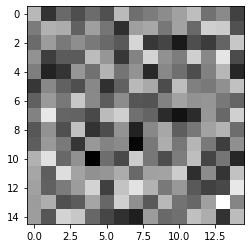

In [147]:
for i in images:
    plt.imshow(i,cmap='gray')

# Artificial Neural Networks
## Basic Model

In [41]:
models = [];

In [104]:
%%time
n = 225

#Initializing ANN
ANNpred= tf.keras.models.Sequential()

#Add input layer
ANNpred.add(tf.keras.layers.Dense(units=n, activation='relu'))

#Add hidden layer
ANNpred.add(tf.keras.layers.Dense(units=(n/2), activation='relu'))

#Add output layer
ANNpred.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#Compiling ANN
ANNpred.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training ANN
ANN_1 = ANNpred.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN_Basic', ANNpred))

Wall time: 853 ms


In [105]:
ANNpred.evaluate(x=Z_test, y=y_test, verbose=1)

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

for ix, layer in enumerate(ANNpred.layers):
    if hasattr(ANNpred.layers[ix], 'kernel_initializer') and \
            hasattr(ANNpred.layers[ix], 'bias_initializer'):
        weight_initializer = ANNpred.layers[ix].kernel_initializer
        bias_initializer = ANNpred.layers[ix].bias_initializer

        old_weights, old_biases = ANNpred.layers[ix].get_weights()

        ANNpred.layers[ix].set_weights([
            weight_initializer(shape=old_weights.shape),
            bias_initializer(shape=old_biases.shape)])

In [35]:
#reset data
#data_T = original_T.copy();
#data_NT = original_NT.copy();

from importlib import reload
reload(FG)

<module 'eegFG.EEG_feature_extraction' from 'C:\\Users\\Musa\\Desktop\\Courses\\Fourth Year\\MANU 465\\PROJECT\\GIT\\MANU465_Team1_Project\\eegFG\\EEG_feature_extraction.py'>